In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji

In [12]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove @ mentions
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', tweet)  # Remove non-alphabetic characters
    tweet = tweet.lower().strip()  # Lowercase and remove leading/trailing spaces
    return tweet

def clean_reddit_comment(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'(u\/|r\/)[A-Za-z0-9_]+', '', comment)  # Remove Reddit mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_without_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters. currently also removing emojis, will change later
    comment = comment.replace('\n', ' ') # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_with_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace() or char in ".,!?;:'\"-()[]{}" or emoji.is_emoji(char))  # Keep only alphanumeric characters, spaces, punctuation and emojis
    comment = comment.replace('\n', ' ')  # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

# Sentiment140 dataset

Source: https://www.kaggle.com/datasets/kazanova/sentiment140

The dataset was automatically created by assuming any tweet with a positive/negative emoji/emoticon was regarded as a positive/negative tweet respectively.  
Dataset with 1.6 million tweets annotated and labelled with a positive and negative sentiment, positive = 4 & negative = 0

In [13]:
sentiment_140_data = pd.read_csv('Datasets/Original/sentiment140.csv', header=None, names=['polarity', 'id', 'date', 'query', 'user', 'text'])
print(f"Shape of sentiment140 dataset: {sentiment_140_data.shape}")
sentiment_140_data.head()


Shape of sentiment140 dataset: (1600000, 6)


,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
sentiment_140_data = sentiment_140_data.drop(['id', 'date', 'query', 'user'], axis=1)
sentiment_140_data['polarity'] = sentiment_140_data['polarity'].map({0: 0, 4: 1}) # Map 4 (positive) to 1 and 0 (negative) to 0, 1 will be positive and 0 will be negative
sentiment_140_data['source'] = 'Twitter'
sentiment_140_data.head()

,polarity,text,source
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Twitter
1,0,is upset that he can't update his Facebook by ...,Twitter
2,0,@Kenichan I dived many times for the ball. Man...,Twitter
3,0,my whole body feels itchy and like its on fire,Twitter
4,0,"@nationwideclass no, it's not behaving at all....",Twitter


In [15]:
sentiment_140_data['text'] = sentiment_140_data['text'].apply(clean_tweet)
sentiment_140_data = sentiment_140_data[['text', 'polarity', 'source']]
sentiment_140_data.head()

,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter


# Reddit Dataset

Source: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Reddit dataset consisting of comments directed towards the general elections held in India 2019.  
The datasets consist of 36801 entries labelled with a positive and negative sentiment, positive = 1, negative = -1 and netural = 0.

In [16]:
reddit_data = pd.read_csv('Datasets/Original/reddit.csv')
reddit_data = reddit_data.rename(columns={'clean_comment': 'text', 'category': 'polarity'})
print(f"Shape of reddit dataset: {reddit_data.shape}")
reddit_data.head()

Shape of reddit dataset: (37249, 2)


,text,polarity
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [17]:
reddit_data = reddit_data[reddit_data['polarity'] != 0]
print(f"Shape of reddit dataset after removing neutral entries: {reddit_data.shape}")
reddit_data.head()

Shape of reddit dataset after removing neutral entries: (24107, 2)


,text,polarity
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1


In [18]:
reddit_data['polarity'] = reddit_data['polarity'].map({-1: 0, 1: 1})
reddit_data['source'] = 'Reddit'
reddit_data.head()

,text,polarity,source
0,family mormon have never tried explain them t...,1,Reddit
1,buddhism has very much lot compatible with chr...,1,Reddit
2,seriously don say thing first all they won get...,0,Reddit
4,for your own benefit you may want read living ...,1,Reddit
5,you should all sit down together and watch the...,0,Reddit


In [19]:
reddit_data['text'] = reddit_data['text'].apply(clean_reddit_comment) # Clean Reddit comments to ensure consistency even though author claimed it was cleaned beforehand
reddit_data.head()

,text,polarity,source
0,family mormon have never tried explain them th...,1,Reddit
1,buddhism has very much lot compatible with chr...,1,Reddit
2,seriously don say thing first all they won get...,0,Reddit
4,for your own benefit you may want read living ...,1,Reddit
5,you should all sit down together and watch the...,0,Reddit


# Instagram dataset

Source: https://zenodo.org/records/13896353

Instagram dataset consisting of comments related to COVID-19 outbreak from Jan 2020 to Sep 2024, the dataset was generated with the help of VADER and twitter-xlm-roberta-base-sentiment, classifiying with polarity ranging from positive, negative and neutral.

In [20]:
instagram_data = pd.read_excel('Datasets/Original/instagram.xlsx')
print(f"Shape of Instagram dataset: {instagram_data.shape}")
instagram_data

Shape of Instagram dataset: (500153, 6)


,PostID,Post Description,Date,Language Code,Full Language,Sentiment
0,B7mbLCVhYIf,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,01/21/2020,en,English,positive
1,B7o2ozppOnS,#Viral China no deja salir a #11millones de ci...,01/22/2020,es,Spanish,negative
2,B7nMy1Xl7st,Önce tedbir sonra tevekkül inşallah. Wuhanda o...,01/22/2020,tr,Turkish,negative
3,B7m7M3SgvI1,Using humor to bring attention to a serious ma...,01/22/2020,en,English,negative
4,B7oK_DMhtxr,Stay safe\nCover your face\n#typ262 #40mm #40m...,01/22/2020,en,English,positive
...,...,...,...,...,...,...
500148,DAN7BsTuBrG,"👀Vacaciones en Argentina, todo lo que tenés qu...",09/22/2024,es,Spanish,neutral
500149,DARcSwAB8NH,✨Care for COVID: Crafting Day Recap🤩🫶\n\nThank...,09/23/2024,en,English,positive
500150,DARz37eIGCX,Feliz día internacional de la enfermería!!! Es...,09/23/2024,es,Spanish,positive
500151,DAQ-rPtRp3D,"En cette période de confinement, je vous envoi...",09/23/2024,fr,French,negative


In [21]:
instagram_data = instagram_data[instagram_data['Full Language'] == 'English']
instagram_data = instagram_data[instagram_data['Sentiment'] != 'neutral']
instagram_data = instagram_data.drop(['PostID','Date','Language Code','Full Language'], axis=1)
print(f"Shape of Instagram dataset after adjustments: {instagram_data.shape}")
instagram_data

Shape of Instagram dataset after adjustments: (221346, 2)


,Post Description,Sentiment
0,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,positive
3,Using humor to bring attention to a serious ma...,negative
4,Stay safe\nCover your face\n#typ262 #40mm #40m...,positive
5,Did you know an outbreak of a new coronavirus ...,negative
7,It’s so sad and scary that the coronavirus has...,negative
...,...,...
500140,🎉Joanna Loeber and Tomás Yan for representing ...,positive
500141,🎉Joanna Loeber and Tomás Yan for representing ...,positive
500142,🎉Joanna Loeber and Tomás Yan representing our ...,positive
500144,Hang in there ❤️\n.\nI know that it's hard to ...,positive


In [22]:
instagram_data = instagram_data.rename(columns={'Sentiment': 'polarity', 'Post Description': 'text'})
instagram_data['polarity'] = instagram_data['polarity'].map({'negative': 0, 'positive': 1})
instagram_data['source'] = 'Instagram'
instagram_data

,text,polarity,source
0,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,1,Instagram
3,Using humor to bring attention to a serious ma...,0,Instagram
4,Stay safe\nCover your face\n#typ262 #40mm #40m...,1,Instagram
5,Did you know an outbreak of a new coronavirus ...,0,Instagram
7,It’s so sad and scary that the coronavirus has...,0,Instagram
...,...,...,...
500140,🎉Joanna Loeber and Tomás Yan for representing ...,1,Instagram
500141,🎉Joanna Loeber and Tomás Yan for representing ...,1,Instagram
500142,🎉Joanna Loeber and Tomás Yan representing our ...,1,Instagram
500144,Hang in there ❤️\n.\nI know that it's hard to ...,1,Instagram


In [23]:
instagram_data['text'] = instagram_data['text'].apply(clean_instagram_comment_with_emoji)
instagram_data

,text,polarity,source
0,questions and answers on coronavirus pt. 2 is...,1,Instagram
3,using humor to bring attention to a serious ma...,0,Instagram
4,stay safe cover your face 公德心 人見人憎,1,Instagram
5,did you know an outbreak of a new coronavirus ...,0,Instagram
7,its so sad and scary that the coronavirus has ...,0,Instagram
...,...,...,...
500140,🎉joanna loeber and tomás yan for representing ...,1,Instagram
500141,🎉joanna loeber and tomás yan for representing ...,1,Instagram
500142,🎉joanna loeber and tomás yan representing our ...,1,Instagram
500144,hang in there ❤ . i know that it's hard to eve...,1,Instagram


In [24]:
data_combined = pd.concat([sentiment_140_data, reddit_data, instagram_data], ignore_index=True)
print(f"Shape of combined dataset: {data_combined.shape}")
data_combined

Shape of combined dataset: (1845453, 3)


,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter
...,...,...,...
1845448,🎉joanna loeber and tomás yan for representing ...,1,Instagram
1845449,🎉joanna loeber and tomás yan for representing ...,1,Instagram
1845450,🎉joanna loeber and tomás yan representing our ...,1,Instagram
1845451,hang in there ❤ . i know that it's hard to eve...,1,Instagram


In [25]:
data_combined.to_csv('Datasets/Cleaned/combined_dataset.csv', encoding='utf-8', index=False)

# Data Analysis

In [26]:
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

In [27]:
preview_data = pd.read_csv('Datasets/Cleaned/combined_dataset.csv')
preview_data

,text,polarity,source
0,"- awww, that's a bummer. you shoulda got davi...",0,Twitter
1,is upset that he can't update his facebook by ...,0,Twitter
2,i dived many times for the ball. managed to sa...,0,Twitter
3,my whole body feels itchy and like its on fire,0,Twitter
4,"no, it's not behaving at all. i'm mad. why am ...",0,Twitter
...,...,...,...
1845448,🎉joanna loeber and tomás yan for representing ...,1,Instagram
1845449,🎉joanna loeber and tomás yan for representing ...,1,Instagram
1845450,🎉joanna loeber and tomás yan representing our ...,1,Instagram
1845451,hang in there ❤ . i know that it's hard to eve...,1,Instagram


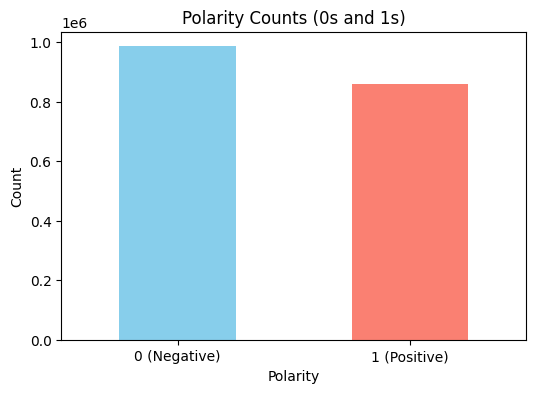

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each polarity value (0 and 1)
polarity_counts = preview_data['polarity'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 4))
polarity_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Polarity Counts (0s and 1s)')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (Negative)', '1 (Positive)'], rotation=0)
plt.show()


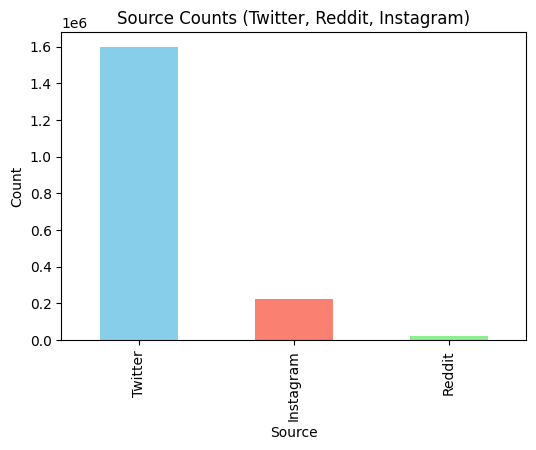

In [29]:
# Count the occurrences of each polarity value (0 and 1)
source_count = preview_data['source'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 4))
source_count.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Source Counts (Twitter, Reddit, Instagram)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()